In [5]:
import pandas as pd 
import numpy as np
import theano

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\HASAN TAREK\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [21]:
df = pd.read_csv('data/ratings.csv')

In [22]:
df.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [23]:
movie_titles = pd.read_csv('data/movies.csv')


In [24]:
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
df = pd.merge(df, movie_titles, on='movieId')


In [26]:
df.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [27]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [28]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())


In [29]:
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [30]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()

In [31]:
ratings.head(10)

,rating,number_of_ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


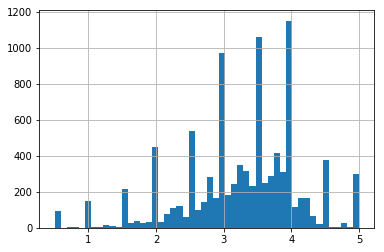

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

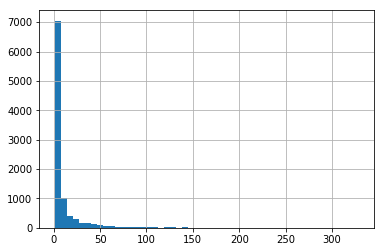

In [33]:
ratings['number_of_ratings'].hist(bins=50)

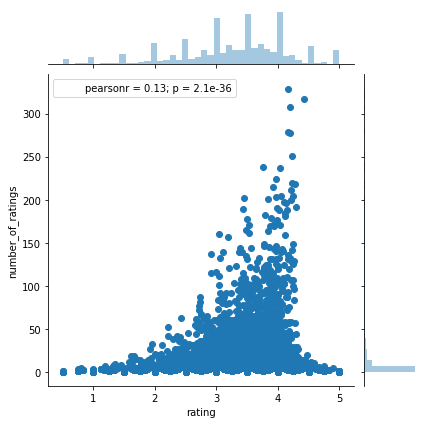

In [34]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [35]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')


In [36]:
movie_matrix.head(100)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [37]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [38]:
movie_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [39]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

In [41]:
AFO_user_rating.head(10)

userId
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: Air Force One (1997), dtype: float64

In [42]:
contact_user_rating.head(10)

userId
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     5.0
8     NaN
9     NaN
10    NaN
Name: Contact (1997), dtype: float64

In [43]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)

C:\Users\HASAN TAREK\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\HASAN TAREK\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [45]:
similar_to_air_force_one.head(100)

title
'71 (2014)                                                     NaN
'Hellboy': The Seeds of Creation (2004)                        NaN
'Round Midnight (1986)                                         NaN
'Salem's Lot (2004)                                            NaN
'Til There Was You (1997)                                      NaN
'Tis the Season for Love (2015)                                NaN
'burbs, The (1989)                                        0.168459
'night Mother (1986)                                           NaN
(500) Days of Summer (2009)                               0.086874
*batteries not included (1987)                           -0.866025
...All the Marbles (1981)                                      NaN
...And Justice for All (1979)                                  NaN
00 Schneider - Jagd auf Nihil Baxter (1994)                    NaN
1-900 (06) (1994)                                              NaN
10 (1979)                                               

In [46]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

C:\Users\HASAN TAREK\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\HASAN TAREK\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [47]:
similar_to_contact.head(10)

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                         0.486761
'night Mother (1986)                            NaN
(500) Days of Summer (2009)                0.634064
*batteries not included (1987)             0.868599
dtype: float64

In [48]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])

In [49]:
corr_contact.dropna(inplace=True)

In [58]:
corr_contact.head(10)

,Correlation
title,
"'burbs, The (1989)",0.486761
(500) Days of Summer (2009),0.634064
*batteries not included (1987),0.868599
...And Justice for All (1979),1.000000
10 Things I Hate About You (1999),-0.102640
"10,000 BC (2008)",-0.212431
101 Dalmatians (1996),0.327327
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.224338
12 Angry Men (1957),0.069711


In [59]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)

In [61]:
corr_AFO.head(10)

,correlation
title,
"'burbs, The (1989)",0.168459
(500) Days of Summer (2009),0.086874
*batteries not included (1987),-0.866025
10 Cloverfield Lane (2016),0.192450
10 Items or Less (2006),-1.000000
10 Things I Hate About You (1999),-0.198731
"10,000 BC (2008)",0.478612
101 Dalmatians (1996),0.014306
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.178516


In [62]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])

In [63]:
corr_AFO .head()

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.168459,17
(500) Days of Summer (2009),0.086874,42
*batteries not included (1987),-0.866025,7
10 Cloverfield Lane (2016),0.192450,14
10 Items or Less (2006),-1.000000,3


In [64]:
corr_contact.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.486761,17
(500) Days of Summer (2009),0.634064,42
*batteries not included (1987),0.868599,7
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),-0.102640,54


In [65]:
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Clear and Present Danger (1994),0.698836,110
"Net, The (1995)",0.598322,112
"Green Mile, The (1999)",0.574799,111
"Firm, The (1993)",0.561304,101
"Departed, The (2006)",0.543279,107
Apollo 13 (1995),0.536136,201
Twister (1996),0.511892,123
American Pie (1999),0.501064,103
"Truman Show, The (1998)",0.500529,125


In [66]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112
Outbreak (1995),0.586934,101
E.T. the Extra-Terrestrial (1982),0.569043,122
Apollo 13 (1995),0.563138,201
Die Hard: With a Vengeance (1995),0.552904,144
